In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Import the data
df = pd.read_csv("tennis.csv")
df.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    8 non-null      int64 
 1   article_text  8 non-null      object
 2   source        8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [5]:
df['article_text'][2]

'Roger Federer has revealed that organisers of the re-launched and condensed Davis Cup gave him three days to decide if he would commit to the controversial competition. Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment. "They only left me three days to decide", Federer said. "I didn\'t to have time to consult with all the people I had to consult. "I could not make a decision in that time, so I told them to do what they wanted." The 20-time Grand Slam champion has voiced doubts about the wisdom of the one-week format to be introduced by organisers Kosmos, who have promised the International Tennis Federation up to $3 billion in prize money over the next quarter-century. The competition is set to feature 18 countries in the November 18-24 finals in Madrid next year, and will replace the classic home-

### Tokenization
Coverting this data into sentences.

In [6]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]

In [9]:
# lets view 10 sentences
sentences[0:10]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?"]

### GLoVe
Download the GLoVe txt file from [here](https://www.kaggle.com/danielwillgeorge/glove6b100dtxt) and add this in your directory same as the notebook.

In [10]:
# Importing the GLoVe txt file
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')

In [11]:
# now lets create word-to-word co-occurrence matrix
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [16]:
#checking for word "this"
word_embeddings["this"]

array([-0.57058 ,  0.44183 ,  0.70102 , -0.41713 , -0.34058 ,  0.02339 ,
       -0.071537,  0.48177 , -0.013121,  0.16834 , -0.13389 ,  0.040626,
        0.15827 , -0.44342 , -0.019403, -0.009661, -0.046284,  0.093228,
       -0.27331 ,  0.2285  ,  0.33089 , -0.36474 ,  0.078741,  0.3585  ,
        0.44757 , -0.2299  ,  0.18077 , -0.6265  ,  0.053852, -0.29154 ,
       -0.4256  ,  0.62903 ,  0.14393 , -0.046004, -0.21007 ,  0.48879 ,
       -0.057698,  0.37431 , -0.030075, -0.34494 , -0.29702 ,  0.15095 ,
        0.28248 , -0.16578 ,  0.076131, -0.093016,  0.79365 , -0.60489 ,
       -0.18874 , -1.0173  ,  0.31962 , -0.16344 ,  0.54177 ,  1.1725  ,
       -0.47875 , -3.3842  , -0.081301, -0.3528  ,  1.8372  ,  0.44516 ,
       -0.52666 ,  0.99786 , -0.32178 ,  0.033462,  1.1783  , -0.072905,
        0.39737 ,  0.26166 ,  0.33111 , -0.35629 , -0.16558 , -0.44382 ,
       -0.14183 , -0.37976 ,  0.28994 , -0.029114, -0.35169 , -0.27694 ,
       -1.344   ,  0.19555 ,  0.16887 ,  0.040237, 

In [17]:
# now we will clean the sentences which will improve the quality of our summary
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

In [21]:
clean_sentences = [s.lower() for s in clean_sentences]
clean_sentences[0]

'maria sharapova has basically no friends as tennis players on the wta tour '

In [22]:
# Now lets remove all the stopwords from the sentences.
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]


In [25]:
# Creating sentence vectors which we will use for finding similarity
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [27]:
sentence_vectors[0]

array([ 5.14825583e-02,  1.10544682e-01,  6.94999397e-01,  1.89168096e-01,
       -9.58077684e-02,  3.20288986e-01,  2.70662010e-01,  5.42440832e-01,
       -3.05938005e-01, -1.56364068e-01,  3.70127618e-01,  8.09492469e-02,
        8.41393881e-03,  2.47571543e-01, -3.69342804e-01, -7.61044994e-02,
        8.08582604e-02,  2.30643645e-01, -2.70402402e-01,  5.13828397e-01,
       -6.12548441e-02,  3.87900352e-01,  1.03121363e-01,  7.72494674e-01,
        2.59960234e-01, -7.96069205e-02,  1.42143592e-01, -9.62644577e-01,
        7.54904330e-01,  6.03260659e-02, -4.58570123e-01,  2.36780301e-01,
        2.29152635e-01, -1.56453326e-01,  3.97632688e-01, -2.32720934e-02,
       -5.05520999e-01,  4.13252831e-01, -2.85759270e-01, -1.35231465e-01,
       -1.37098104e-01, -1.48972601e-01,  3.37537557e-01, -3.49540442e-01,
        1.53484434e-01, -2.33341649e-01, -1.98460802e-01, -1.27821520e-01,
        5.08063912e-01, -3.68636876e-01, -2.28472307e-01, -3.15306723e-01,
        1.36149466e-01,  

In [28]:
# now we will use cosine similarity on our sentences
sim_mat = np.zeros([len(sentences), len(sentences)])
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [29]:
# now we will convert this matrix into a graph
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

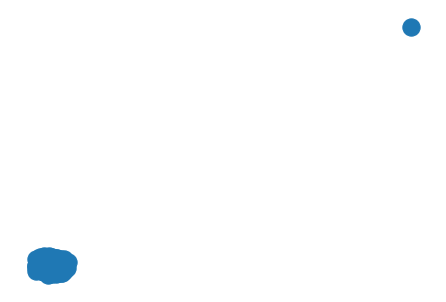

In [32]:
import matplotlib.pyplot as plt
nx.draw(nx_graph)
plt.show() # display

In [34]:
# our final ranked_sentences 
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [38]:
#now lets summarize
print("ARTICLE:")
print(df['article_text'][1])
print('\n')
print("SUMMARY:")
print(ranked_sentences[1][1])
print('\n')

ARTICLE:
BASEL, Switzerland (AP), Roger Federer advanced to the 14th Swiss Indoors final of his career by beating seventh-seeded Daniil Medvedev 6-1, 6-4 on Saturday. Seeking a ninth title at his hometown event, and a 99th overall, Federer will play 93th-ranked Marius Copil on Sunday. Federer dominated the 20th-ranked Medvedev and had his first match-point chance to break serve again at 5-1. He then dropped his serve to love, and let another match point slip in Medvedev's next service game by netting a backhand. He clinched on his fourth chance when Medvedev netted from the baseline. Copil upset expectations of a Federer final against Alexander Zverev in a 6-3, 6-7 (6), 6-4 win over the fifth-ranked German in the earlier semifinal. The Romanian aims for a first title after arriving at Basel without a career win over a top-10 opponent. Copil has two after also beating No. 6 Marin Cilic in the second round. Copil fired 26 aces past Zverev and never dropped serve, clinching after 2 1/2 ho

In [43]:
# Some other examples
for i in range(5):
    print("ARTICLE:",i+1)
    print(df['article_text'][i])
    print('\n')
    print("SUMMARY:")
    print(ranked_sentences[i][1])
    print('\n')

ARTICLE: 1
Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in